In [1]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/home/darkwinter/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
License(s): CC-BY-NC-SA-4.0
100%|████████████████████████████████████████| 178M/178M [01:00<00:00, 3.12MB/s]
100%|████████████████████████████████████████| 178M/178M [01:00<00:00, 3.07MB/s]


In [5]:
! unzip online-payments-fraud-detection-dataset.zip

Archive:  online-payments-fraud-detection-dataset.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [7]:
import pandas as pd
import tensorflow as tf
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

2024-07-04 02:32:23.360811: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-04 02:32:24.085110: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
for col in df.columns:
  unique_values = df[col].unique()
  num_unique_values = len(unique_values)
  print(f"Column: {col}")
  print(f"Number of unique values: {num_unique_values}")
  print(f"Unique values: {unique_values}")
  print()


Column: step
Number of unique values: 743
Unique values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 23

In [ ]:
print(df.isna().sum())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


No null values, that's great.

In [ ]:
df[df["isFlaggedFraud"] == 1]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


We can see the whenever the transactions were marked as fraud, there were actually fraud. So isFlaggedFraud is an extremely important feature

In [ ]:
# Removing the ids
df["isNameDestC"] = df["nameDest"].str[0] == "C"
df.drop("nameDest", axis=1, inplace=True)
df.drop('nameOrig', axis=1, inplace=True)
df.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isNameDestC
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,False
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,False
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,True
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,True
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,False


In [ ]:
# Converting payment type to one hot features

one_hot_paymenttype = pd.get_dummies(df['type'])
df = pd.concat([df, one_hot_paymenttype], axis=1)
df.drop('type', axis=1, inplace=True)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isNameDestC,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,True,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,True,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,False,False,True,False


Now the original data looks pretty clean, let's add some new features.

In [ ]:
# Adding the relative value of the amount to the balances seems like a valuable feature
df['amount_by_oldbalOrig'] = df['amount'] / (df['oldbalanceOrg']+1)   # We are adding 1 everywhere to avoid division by zero
df['amount_by_newbalOrig'] = df['amount'] / (df['newbalanceOrig']+1)
df['amount_by_oldbalDest'] = df['amount'] / (df['oldbalanceDest']+1)
df['amount_by_newbalDest'] = df['amount'] / (df['newbalanceDest']+1)

# Inverse of the above four columns
df['oldbalOrig_by_amount'] = df['oldbalanceOrg'] / (df['amount']+1)
df['newbalOrig_by_amount'] = df['newbalanceOrig'] / (df['amount']+1)
df['oldbalDest_by_amount'] = df['oldbalanceDest'] / (df['amount']+1)
df['newbalDest_by_amount'] = df['newbalanceDest'] / (df['amount']+1)

# Since the amount has a large range of values, the log of the values will be a good feature to add
df['log_amount'] = np.log(df['amount']+1)
df['log_oldbalanceOrg'] = np.log(df['oldbalanceOrg']+1)
df['log_newbalanceOrig'] = np.log(df['newbalanceOrig']+1)
df['log_newbalanceDest'] = np.log(df['newbalanceDest']+1)
df['log_oldbalanceDest'] = np.log(df['oldbalanceDest']+1)

df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isNameDestC,CASH_IN,...,amount_by_newbalDest,oldbalOrig_by_amount,newbalOrig_by_amount,oldbalDest_by_amount,newbalDest_by_amount,log_amount,log_oldbalanceOrg,log_newbalanceOrig,log_newbalanceDest,log_oldbalanceDest
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,...,9839.64,17.289119,16.289221,0.000000,0.0,9.194276,12.044359,11.984786,0.0,0.000000
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,...,1864.28,11.391855,10.392391,0.000000,0.0,7.531166,9.964112,9.872292,0.0,0.000000
2,1,181.00,181.0,0.00,0.0,0.0,1,0,True,False,...,181.00,0.994505,0.000000,0.000000,0.0,5.204007,5.204007,0.000000,0.0,0.000000
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,True,False,...,181.00,0.994505,0.000000,116.384615,0.0,5.204007,5.204007,0.000000,0.0,9.960954
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,...,11668.14,3.561016,2.561102,0.000000,0.0,9.364703,10.634773,10.305174,0.0,0.000000


In [ ]:
y = df['isFraud']
X = df.drop('isFraud', axis=1)

In [ ]:
def normalize_column(column):
  """
  Normalizes a column by subtracting the mean and dividing by the standard deviation.
  """
  mean = column.mean()
  std = column.std()
  return (column - mean) / std

for col in X.columns:
  if X[col].dtype == np.float64 or X[col].dtype == np.int64:
    X[col] = normalize_column(X[col])

X.head()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isNameDestC,CASH_IN,CASH_OUT,...,amount_by_newbalDest,oldbalOrig_by_amount,newbalOrig_by_amount,oldbalDest_by_amount,newbalDest_by_amount,log_amount,log_oldbalanceOrg,log_newbalanceOrig,log_newbalanceDest,log_oldbalanceDest
0,-1.703041,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,-0.001586,False,False,False,...,-0.049065,-0.009214,-0.009502,-0.008909,-0.00906,-0.907462,0.816576,1.045603,-1.248013,-1.144463
1,-1.703041,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,-0.001586,False,False,False,...,-0.140398,-0.011002,-0.011289,-0.008909,-0.00906,-1.824023,0.449673,0.711877,-1.248013,-1.144463
2,-1.703041,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,-0.001586,True,False,False,...,-0.159675,-0.014153,-0.014440,-0.008909,-0.00906,-3.106552,-0.389887,-0.847721,-1.248013,-1.144463
3,-1.703041,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,-0.001586,True,False,True,...,-0.159675,-0.014153,-0.014440,0.014758,-0.00906,-3.106552,-0.389887,-0.847721,-1.248013,0.331751
4,-1.703041,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,-0.001586,False,False,False,...,-0.028125,-0.013375,-0.013663,-0.008909,-0.00906,-0.813537,0.567961,0.780263,-1.248013,-1.144463


Now that we have our dataset ready, lets make it ready for model training

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isNameDestC,CASH_IN,CASH_OUT,...,amount_by_newbalDest,oldbalOrig_by_amount,newbalOrig_by_amount,oldbalDest_by_amount,newbalDest_by_amount,log_amount,log_oldbalanceOrg,log_newbalanceOrig,log_newbalanceDest,log_oldbalanceDest
6271196,2.638920,0.342006,1.328034,1.436652,-0.174944,-0.300846,-0.001586,True,True,False,...,-0.161710,-0.010792,-0.010473,-0.008643,-0.008997,1.115298,1.400766,1.590829,0.503623,0.802050
1888243,-0.557831,0.053981,-0.207478,-0.139539,-0.086687,-0.171855,-0.001586,True,True,False,...,-0.161743,-0.014120,-0.013802,-0.008137,-0.008492,0.785686,0.873268,1.207647,0.743558,0.871041
5549957,0.973799,-0.264788,-0.287458,-0.292442,-0.323814,-0.333411,-0.001586,False,False,False,...,0.066919,-0.014400,-0.014440,-0.008909,-0.009060,-0.517472,0.138241,-0.847721,-1.248013,-1.144463
2025342,-0.445418,0.575888,-0.226320,-0.292442,-0.296702,-0.164726,-0.001586,True,False,True,...,-0.161738,-0.014351,-0.014440,-0.008873,-0.008821,1.286989,0.826728,-0.847721,0.750028,0.549650
682342,-1.457137,0.043398,-0.288716,-0.292442,0.303247,0.302811,-0.001586,True,False,False,...,-0.161746,-0.014455,-0.014440,-0.006805,-0.006756,0.768853,-1.307741,-0.847721,0.948903,1.015157


Now since there are only some 8000 fraud examples out of 6 million, we will use undersampling to balance the dataset

In [ ]:
fraud_indices = df[df['isFraud'] == 1].index
non_fraud_indices = df[df['isFraud'] == 0].index

# Randomly select the same number of non-fraud indices as there are fraud indices
random_non_fraud_indices = np.random.choice(non_fraud_indices, len(fraud_indices), replace=False)

# Combine the fraud and non-fraud indices
undersampled_indices = np.concatenate([fraud_indices, random_non_fraud_indices])

# Create the undersampled data sets
X_train_small = X.loc[undersampled_indices]
y_train_small = y.loc[undersampled_indices]

# Print the number of fraud and non-fraud examples in the undersampled data sets
print("Number of fraud examples in undersampled data set:", len(X_train_small[y_train_small == 1]))
print("Number of non-fraud examples in undersampled data set:", len(X_train_small[y_train_small == 0]))


Number of fraud examples in undersampled data set: 8213
Number of non-fraud examples in undersampled data set: 8213


We are finally ready to start training the models

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

def calculate_metrics(y_true, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  auc = roc_auc_score(y_test, y_pred)

  print(f"Accuracy: {accuracy}")
  print(f"F1 Score: {f1}")
  print(f"ROC AUC Score: {auc}")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
  cm = confusion_matrix(y_test, y_pred)

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

Model 1 : XGBoost

In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(
    n_estimators=500,
    objective='binary:logistic',
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    seed=42,
)

model_xgb.fit(X_train_small, y_train_small)
y_pred_xgb = model_xgb.predict(X_test)
calculate_metrics(y_test, y_pred_xgb)


Accuracy: 0.9996133668205864
F1 Score: 0.8681672025723473
ROC AUC Score: 0.9998064369928806


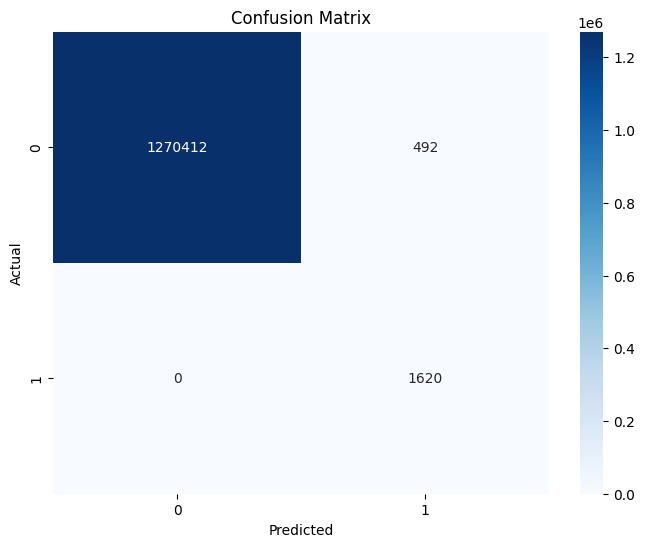

In [ ]:
plot_confusion_matrix(y_test, y_pred)

Model 2 : Random Forest

Accuracy: 0.9992848857860441
F1 Score: 0.7807228915662651
ROC AUC Score: 0.9996419871209785


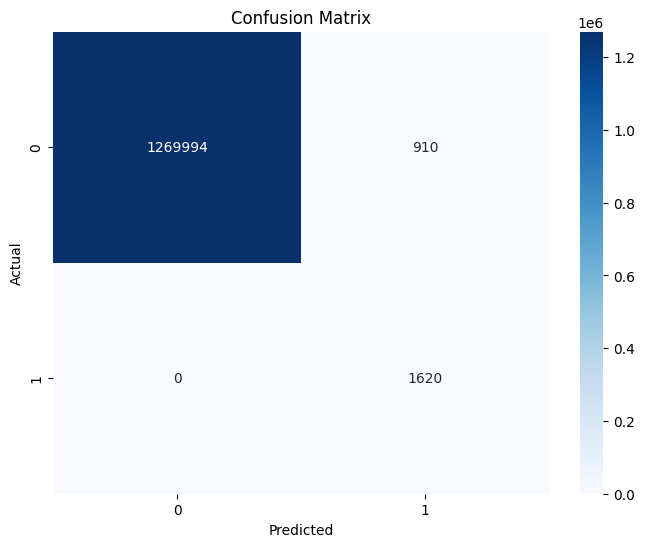

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state=0)
model_rf.fit(X_train_small, y_train_small)
y_pred_rf = model_rf.predict(X_test)

calculate_metrics(y_test, y_pred_rf)
plot_confusion_matrix(y_test, y_pred_rf)


In [ ]:
# import keras
# from keras import layers

# keras_model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#         layers.Dense(32, activation='relu'),
#         layers.Dense(1, activation='sigmoid'),
#     ])

# early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# history = keras_model.fit(X_train_small, y_train_small, epochs=10, batch_size=32,
#                           validation_data=(X_test, y_test), callbacks=[early_stopping])

# # We will have to deal with na values before using keras

Model 3 : SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [1,10,100],
    'gamma': [0.1 ,0.01,0.01],
    'kernel': ['rbf', 'linear']
}

# Initialize the grid search object with the SVM model and parameter grid
grid_search = GridSearchCV(SVC(), param_grid, cv=2, scoring='f1',verbose=2)

# Fit the grid search object to the training data
grid_search.fit(X_train_small, y_train_small)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   1.3s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   1.8s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   2.8s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   1.4s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END .....................C=1, gamma=0.01, k

Accuracy: 0.9782896039681767
F1 Score: 0.10473443727923781
ROC AUC Score: 0.9878979708271036


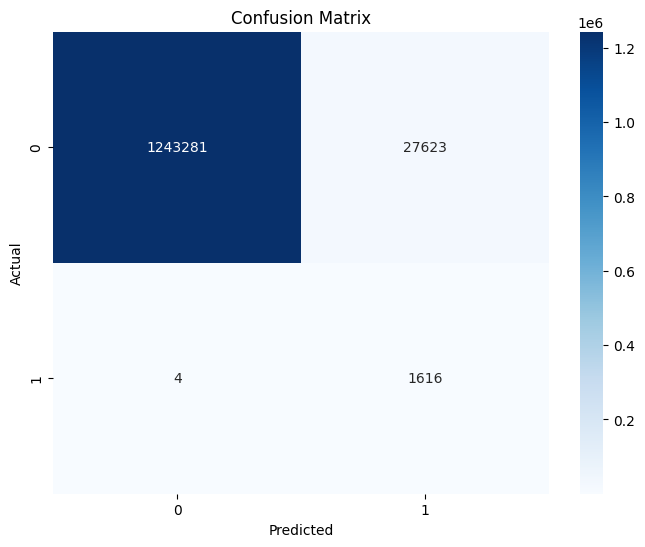

In [ ]:
# Train the SVM model with the best parameters on the entire training data
best_model = SVC(**grid_search.best_params_)
best_model.fit(X_train_small, y_train_small)

# Evaluate the best model on the test data
y_pred_svm = best_model.predict(X_test)
calculate_metrics(y_test, y_pred_svm)
plot_confusion_matrix(y_test, y_pred_svm)

Turns out SVMs are terrible for these type of tasks.

Accuracy: 0.9925675272136322
F1 Score: 0.25480617711944537
ROC AUC Score: 0.9953542809189654


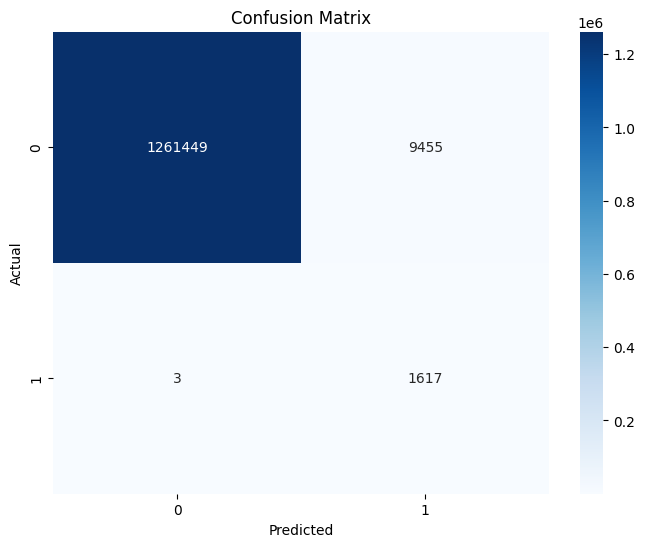

In [ ]:
from sklearn.neural_network import MLPClassifier

# Create a simple neural network model
model_nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)

# Train the model on the training data
model_nn.fit(X_train_small, y_train_small)

# Evaluate the model on the test data
y_pred_nn = model_nn.predict(X_test)
calculate_metrics(y_test, y_pred_nn)
plot_confusion_matrix(y_test, y_pred_nn)


Again, the accuracy might seem fine but there are too many false positives for this to be a good model.

Accuracy: 0.9630788888853963
F1 Score: 0.06432597136199789
ROC AUC Score: 0.9799746703095291


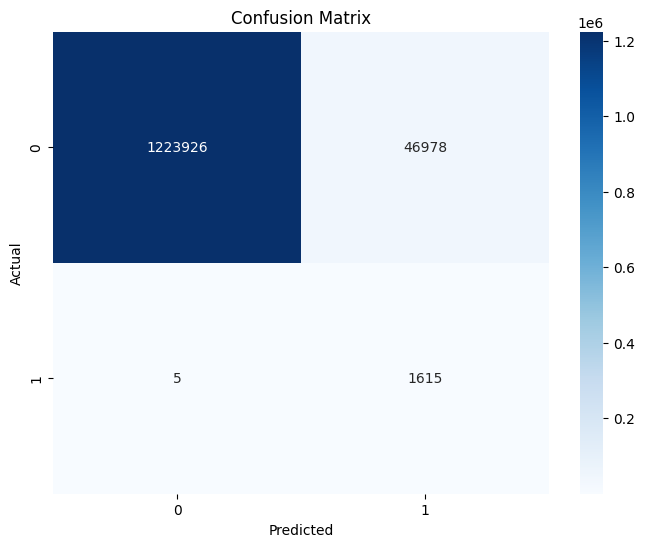

In [ ]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(max_iter=3000)
model_log.fit(X_train_small, y_train_small)
y_pred_log = model_log.predict(X_test)

calculate_metrics(y_test, y_pred_log)
plot_confusion_matrix(y_test, y_pred_log)


### Results

In [12]:
models = ["XGBoost", "Random Forest", "SVM", "Neural Network", "Logistic Regression"]
accuracies = [0.9996, 0.9992, 0.9782, 0.9925, 0.9630]
f1_scores = [0.87, 0.78, 0.10, 0.25, 0.06]
auc_scores = [0.9998, 0.9996, 0.9878, 0.9953, 0.9799]

results = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "F1 Score": f1_scores,
    "ROC AUC Score": auc_scores
})

print(results.to_string())


                 Model  Accuracy  F1 Score  ROC AUC Score
0              XGBoost    0.9996      0.87         0.9998
1        Random Forest    0.9992      0.78         0.9996
2                  SVM    0.9782      0.10         0.9878
3       Neural Network    0.9925      0.25         0.9953
4  Logistic Regression    0.9630      0.06         0.9799


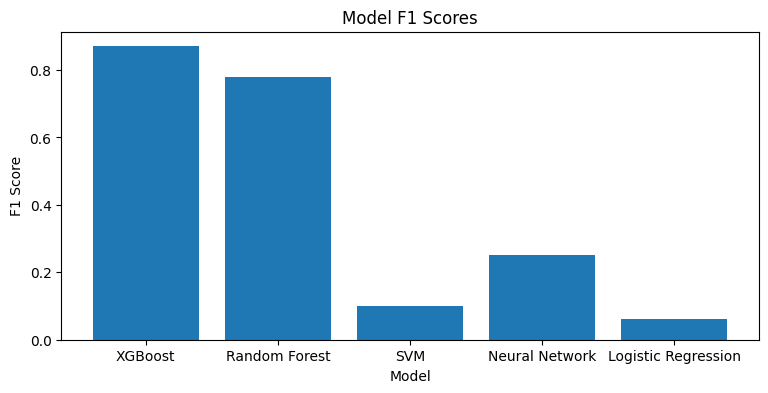

In [11]:
# Bar chart of the model F1 scores
plt.figure(figsize=(9, 4))
plt.bar(models, f1_scores)
plt.title("Model F1 Scores")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.show()

Overall, The XGBoost model performed the best with the highest accuracy (99.96%) and F1 score (87%).
